<a href="https://colab.research.google.com/github/samirapakravan/ComputerVision/blob/main/UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=u1loyDCoGbE

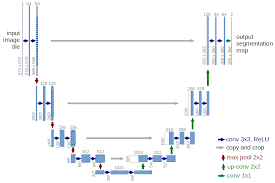

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def double_conv(in_c, out_c):
  conv = nn.Sequential(
      nn.Conv2d(in_c, out_c, kernel_size=3),
      nn.ReLU(inplace=True),
      nn.Conv2d(out_c, out_c, kernel_size=3),
      nn.ReLU(inplace=True)
  )
  return conv

def crop_image(original_tensor, target_tensor):
  taret_size = target_tensor.size()[2] #channel [0], batch[1], w[2], h[3] either 2 or 3
  original_size = original_tensor.size()[2]
  delta = (original_size - taret_size)//2 # since we are cropping so orig is always larger than target
  return original_tensor[:,:, delta:original_size-delta, delta:original_size-delta]

class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.max_pool_2x2 = nn.MaxPool2d(kernel_size=2,stride=2)
    self.down_conv_1 = double_conv(1, 64)
    self.down_conv_2 = double_conv(64, 128)
    self.down_conv_3 = double_conv(128, 256)
    self.down_conv_4 = double_conv(256, 512)
    self.down_conv_5 = double_conv(512, 1024)

    self.up_trans_1 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=2,stride=2)
    self.up_conv_1 = double_conv(1024,512)
    self.up_trans_2 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=2,stride=2)
    self.up_conv_2 = double_conv(512,256)
    self.up_trans_3 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=2,stride=2)
    self.up_conv_3 = double_conv(256,128)
    self.up_trans_4 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2,stride=2)
    self.up_conv_4 = double_conv(128,64)

    self.out = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=1)

  def forward(self, X):

    # Encoder
    X1 = self.down_conv_1(X)   #
    X2 = self.max_pool_2x2(X1)
    X3 = self.down_conv_2(X2)  #
    X4 = self.max_pool_2x2(X3)
    X5 = self.down_conv_3(X4)  #
    X6 = self.max_pool_2x2(X5)
    X7 = self.down_conv_4(X6)  #
    X8 = self.max_pool_2x2(X7)
    X9 = self.down_conv_5(X8) 

    # Decoder 
    X = self.up_trans_1(X9)
    X7_new = crop_image(X7,X)
    X = self.up_conv_1(torch.cat([X,X7_new], 1))

    X = self.up_trans_2(X)
    X5_new = crop_image(X5,X)
    X = self.up_conv_2(torch.cat([X,X5_new], 1))

    X = self.up_trans_3(X)
    X3_new = crop_image(X3,X)
    X = self.up_conv_3(torch.cat([X,X3_new], 1))

    X = self.up_trans_4(X)
    X1_new = crop_image(X1,X)
    X = self.up_conv_4(torch.cat([X,X1_new], 1))

    print(X.size())
    

    #return X
  

In [ ]:
image = torch.rand((1,1,572,572))  # (bach, channel, height, weight)
model = UNet()
print(model(image))

torch.Size([1, 64, 388, 388])
None
